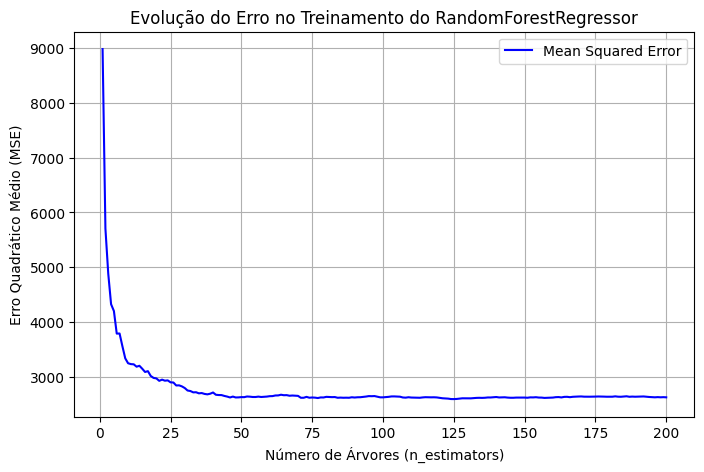

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Criando um dataset de exemplo
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuração do modelo com warm_start=True para adicionar árvores progressivamente
rf = RandomForestRegressor(n_estimators=1, warm_start=True, random_state=42)

errors = []

# Treinamento incremental
for n_estimators in range(1, 201):  # De 1 a 200 estimadores
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)  # Continua o treinamento sem perder árvores anteriores
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# 🔹 Plotando o erro ao longo do número de árvores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 201), errors, label="Mean Squared Error", color='blue')
plt.xlabel("Número de Árvores (n_estimators)")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("Evolução do Erro no Treinamento do RandomForestRegressor")
plt.legend()
plt.grid()
plt.show()
